# Download HLS Landsat 30 and ERA5-Land Hourly Data

Following the tutorial in the [Getting Started Notebook](./1_getting_started.ipynb), this notebook allows you to download the datasets required to evaluate the granite-geospatial-land-surface-temperature model on new cities of interest. 

HLS Landsat 30 data will be downloaded from the [NASA CMR-STAC](https://github.com/nasa/cmr-stac) and ERA5-Land hourly $T_{2m}$ data will be downloaded from the Copernicus Climate Data Store through the CDS API. Ensure you have set up the CDS API for the Beta version, as explained [here](https://cds.climate.copernicus.eu/how-to-api)

As illustrated in the image below, for a given city, these two datasets are preprocessed to produce an inferencing dataset.

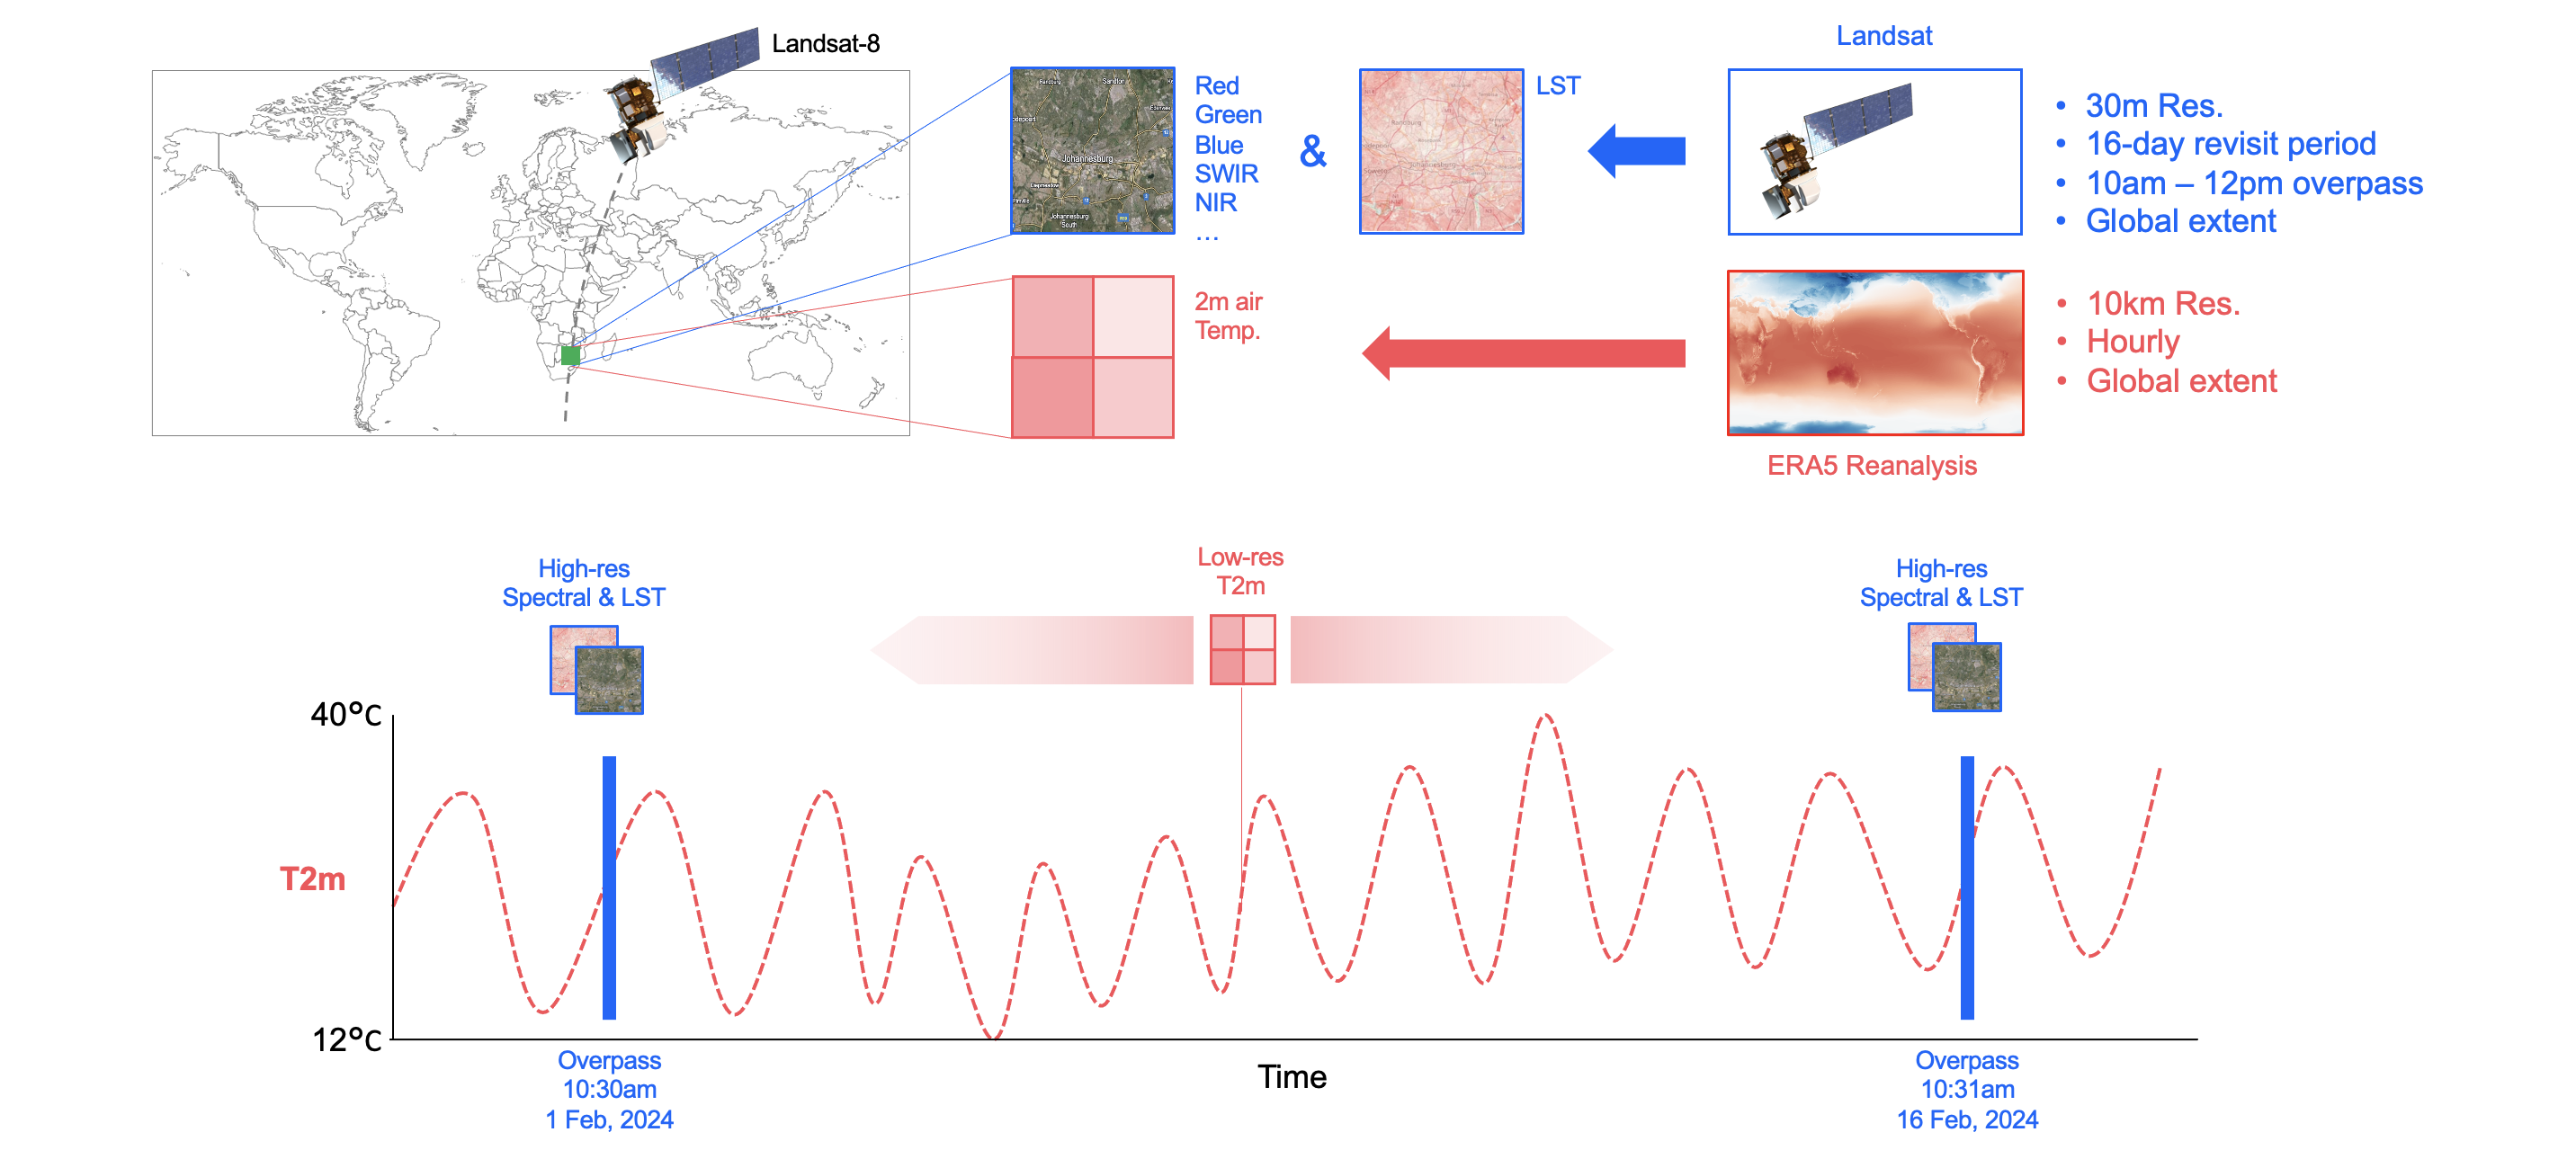

## Run downloads for new cities

Activate the environment created in the [Getting Started Notebook](./1_getting_started.ipynb)

**Edit the [config file](../utils/config_download.json) to include:** <br><br>
* new cities of interest: "city-name_ISO" (browse the drop-down below), <br><br>
* period of interest, and <br><br>
* cloud cover percentage
<br>
<br>


In [2]:
import ipywidgets as widgets
import pandas as pd

#  City selection
df = pd.read_csv("../assets/databases/global_cities_database.csv", usecols =["CITY-NAME_ISO"])
print("List of available cities")

city_drop_down = widgets.Dropdown(options=df['CITY-NAME_ISO'],
                layout={'width':'max-content'},
                description='city-name:',
                disabled=False)

display(city_drop_down)

List of available cities


Dropdown(description='city-name:', layout=Layout(width='max-content'), options=('aba_nga', 'abbottabad_pak', '…

#### **Warning**: 
Depending on the number of cities and period of interest, large RAM might be required to run the download cell below. You may consider downloading one city at a time, based on your available resources.

In [4]:
!python ../utils/main_download.py --configpath ../utils/config_download.json

Found 40 HLS band images for bengaluru_ind with 30.0 % cloud cover, preparing to download.
Found 50 HLS band images for cape-town_zaf with 30.0 % cloud cover, preparing to download.
Completed downloading HLS files.
Completed downloading ERA5 Land files.
Workflow for ../utils/config_download.json is complete.


Verify downloads or failed downloads in the log files. 

## Visualize the study regions for the data downloaded

In [1]:
from utils import download_functions
import json
import pandas as pd
import geopandas as gpd
from shapely.geometry import box, Polygon
import numpy as np
import folium

In [2]:
with open("../utils/config_download.json", "r") as json_file_config:
            input_params = json.load(json_file_config)
            workflow_options = input_params["workflow_options"]
            list_cities = workflow_options["city_iso_names"]
            bbox_buffer = workflow_options["city_bbox_buffer"]
            city_coords_list = []
            for city in list_cities:
                city_coords = download_functions.utils.get_city_bbox(city, bbox_buffer, "../assets/databases/global_cities_database.csv")
                city_coords_list.append(city_coords)
            city_coords_list        

In [3]:
# Select which city you want to visualize by changing the index 
# if you have downloaded data for more than one city
i = 0
city_coords_list[i]

{'name': 'bengaluru_ind',
 'maxx': 77.720559727,
 'maxy': 13.2198412475,
 'minx': 77.362134571,
 'miny': 12.8604072837}

In [4]:
# Plot using folium 
bbox = box(city_coords_list[i]['minx'], city_coords_list[i]['miny'], city_coords_list[i]['maxx'], city_coords_list[i]['maxy'], ccw=True)
map = folium.Map(zoom_start=5, tiles="OpenStreetMap")
folium.GeoJson(bbox).add_to(map)
bounds = list(bbox.bounds)
map.fit_bounds([bounds[:2][::-1], bounds[2:][::-1]])
map

The folium map does not show in this notebook, please run the above cell locally to view the map.